In [1]:
import numpy as np 
import scipy.stats
import pandas as pd
import seaborn as sns
import random
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
 
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans,DBSCAN,SpectralClustering,AgglomerativeClustering,Birch
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import svm

## Generate Random 2D Data : with labels

In [2]:
n = 100
mean_1 = [0,0]
cov_1 = [[10,-50],
        [-50, 100]] 
# x,y = np.random.multivariate_normal(mean_1,cov_1,n).T

mean_2 = [30,50]
cov_2 = [[10,70],
        [70,100]] 
# x_2,y_2 = np.random.multivariate_normal(mean_2,cov_2,n).T
random.seed(123)
x,y = np.append(np.random.multivariate_normal(mean_1,cov_1,n).T,
                 np.random.multivariate_normal(mean_2,cov_2,n).T,
                axis=1
                )

data = pd.DataFrame({'x':x,'y':y})
del x,y
data['label'] = np.append(np.repeat(0,n),np.repeat(1,n),axis = 0)
data['Constrained_label'] = [2 if (xx>0 and yy < 0) else zz for (xx,yy,zz) in zip(data.x,data.y,data.label)]
data.reset_index(inplace=True)
data.head()

,index,x,y,label,Constrained_label
0,0,-6.902703,13.495761,0,0
1,1,4.213318,1.608274,0,0
2,2,7.267868,-5.867056,0,2
3,3,7.226127,-3.049327,0,2
4,4,-0.168285,7.063201,0,0


In [3]:
print("Unique Lables in data :",data.Constrained_label.unique())
scale = StandardScaler()
stand_data = pd.DataFrame(scale.fit_transform(data.iloc[:,0:2]),columns = ['x','y'])
stand_data['Constrained_label'] = data.Constrained_label
stand_data.iloc[:,0:2].to_csv("./data.txt",header = False,index = False,sep = "\t")
stand_data.head()

Unique Lables in data : [0 2 1]


,x,y,Constrained_label
0,-1.723412,-1.335645,0
1,-1.706091,-0.672151,0
2,-1.688771,-0.489830,2
3,-1.671450,-0.492322,2
4,-1.654129,-0.933680,0


CPU times: user 519 ms, sys: 53.8 ms, total: 573 ms
Wall time: 271 ms


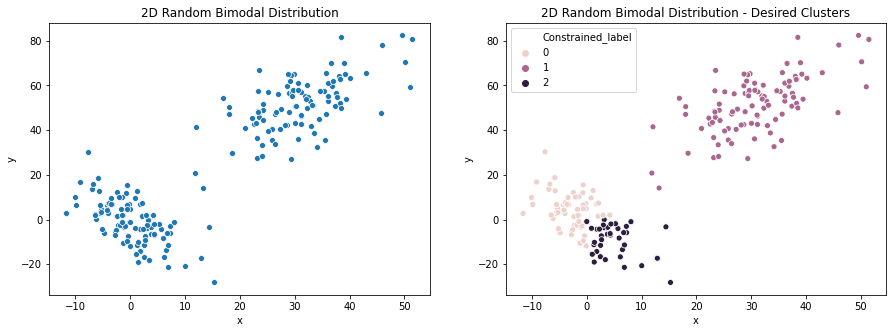

In [4]:
%%time 
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(data.x,data.y).set_title("2D Random Bimodal Distribution")
plt.subplot(122)
sns.scatterplot(data.x,data.y,hue=data.Constrained_label).set_title("2D Random Bimodal Distribution - Desired Clusters")
plt.savefig("./ExpectedOutput.png")

In [ ]:
### Apply Clustering - Kmeans